## Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly. 

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
cust=pd.read_csv("Customer.csv")
cust.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [63]:
tran=pd.read_csv("Transactions.csv")
tran.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [64]:
prod=pd.read_csv("prod_cat_info.csv")
prod

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [65]:
df1 = pd.merge(tran,cust,left_on='cust_id',right_on='customer_Id',how='left')
df1.drop(columns='customer_Id',inplace=True)
df1.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0


In [66]:
Customer_final = df1.merge(prod,left_on=['prod_subcat_code','prod_cat_code'],right_on=['prod_sub_cat_code','prod_cat_code'],how='left')
Customer_final.drop(columns=['prod_sub_cat_code'],inplace=True)
Customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY


## 2. Prepare a summary report for the merged data set.  
### a. Get the column names and their corresponding data types

In [67]:
Customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
transaction_id      23053 non-null int64
cust_id             23053 non-null int64
tran_date           23053 non-null object
prod_subcat_code    23053 non-null int64
prod_cat_code       23053 non-null int64
Qty                 23053 non-null int64
Rate                23053 non-null int64
Tax                 23053 non-null float64
total_amt           23053 non-null float64
Store_type          23053 non-null object
DOB                 23053 non-null object
Gender              23044 non-null object
city_code           23045 non-null float64
prod_cat            23053 non-null object
prod_subcat         23053 non-null object
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


### b. Top/Bottom 10 observations

In [68]:
Customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,09-10-1982,F,6.0,Electronics,Personal Appliances
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,29-05-1981,M,9.0,Home and kitchen,Bath
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,21-04-1971,M,9.0,Home and kitchen,Tools
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,04-11-1971,F,8.0,Clothing,Kids
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,27-11-1979,F,3.0,Electronics,Personal Appliances


In [69]:
Customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,10-08-1976,M,8.0,Books,Non-Fiction
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,12-10-1991,M,4.0,Electronics,Mobiles
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,17-01-1980,F,8.0,Books,DIY
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,28-06-1975,F,6.0,Home and kitchen,Bath
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,18-04-1974,M,4.0,Footwear,Kids
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,21-02-1972,M,7.0,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,27-04-1984,M,9.0,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,20-06-1976,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,22-05-1970,M,2.0,Books,Children
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1.0,Books,Children


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max) 

In [70]:
cont = Customer_final.describe()
cont

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000


### d. Frequency tables for all the categorical variables

In [71]:
catcol = Customer_final.columns.difference(cont.columns)
catcol

Index(['DOB', 'Gender', 'Store_type', 'prod_cat', 'prod_subcat', 'tran_date'], dtype='object')

In [72]:
#a=Customer_final.loc[:,Customer_final.dtypes == 'object']
#a.head()

In [47]:
for col in catcol:
    print(Customer_final[col].value_counts())

27-12-1988    32
17-09-1982    32
25-02-1974    27
20-03-1972    25
18-11-1991    24
09-06-1970    24
26-05-1977    23
08-03-1983    22
21-07-1988    22
20-12-1981    22
08-05-1988    21
16-04-1978    21
23-06-1986    21
08-09-1987    21
05-12-1992    21
06-12-1982    21
10-11-1973    20
21-03-1990    20
20-04-1980    20
19-03-1971    20
07-05-1974    19
26-09-1988    19
26-06-1975    19
05-05-1973    19
17-08-1976    19
11-07-1971    19
14-06-1989    19
29-06-1985    19
08-10-1987    19
02-02-1974    19
              ..
29-07-1985     1
11-08-1974     1
08-05-1979     1
16-07-1980     1
18-11-1970     1
03-12-1977     1
05-02-1982     1
20-04-1984     1
11-03-1984     1
16-07-1974     1
13-04-1981     1
13-10-1974     1
14-12-1987     1
18-08-1988     1
19-07-1985     1
27-12-1973     1
08-05-1981     1
13-11-1975     1
19-08-1980     1
23-04-1992     1
12-01-1982     1
24-06-1981     1
26-08-1987     1
09-07-1990     1
01-06-1988     1
17-06-1987     1
15-10-1975     1
10-08-1984    

## 3. Generate histograms for all continuous variables and frequency bars for categorical variables. 

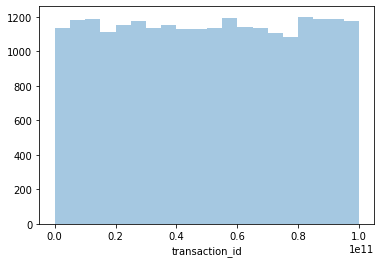

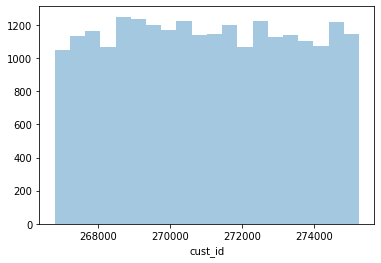

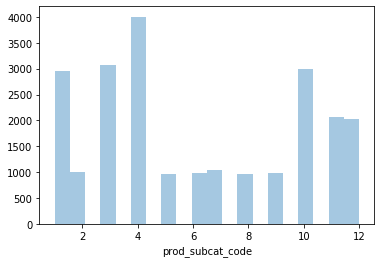

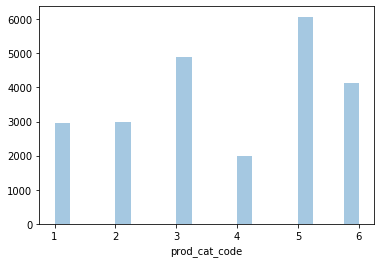

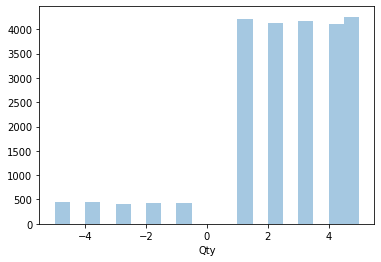

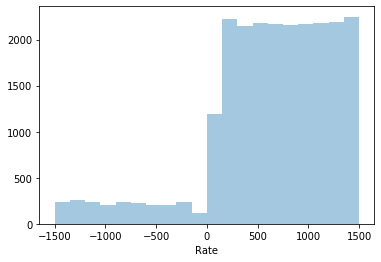

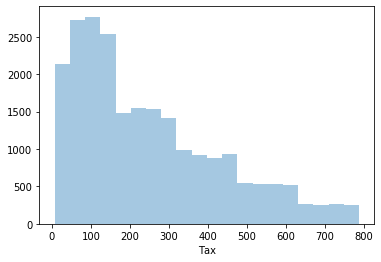

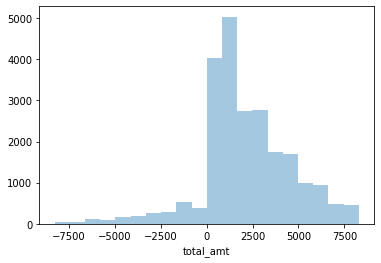

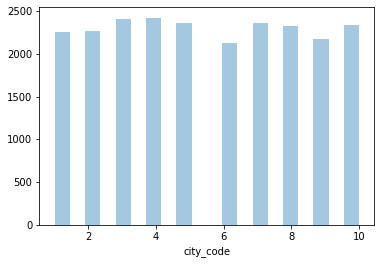

In [87]:
for col1 in cont.columns:
    sns.distplot(Customer_final[col1],kde=False,bins=20)
    plt.show()

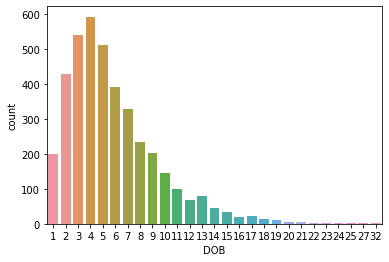

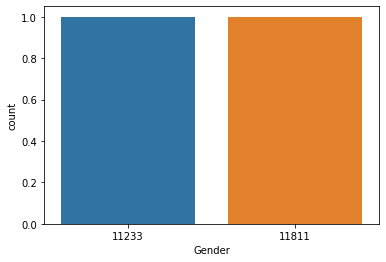

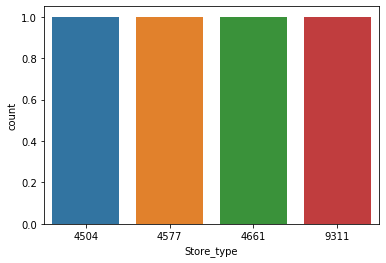

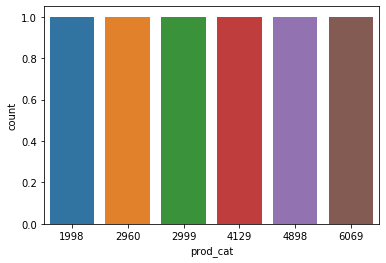

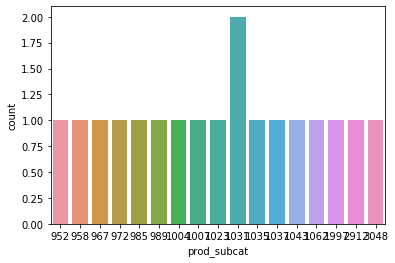

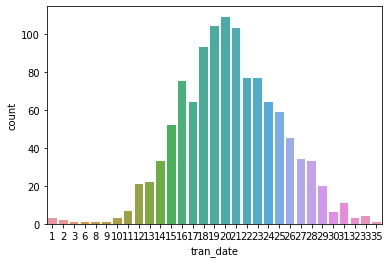

In [89]:
for col2 in catcol:
    sns.countplot(Customer_final[col2].value_counts())
    plt.show()

## 4. Calculate the following information using the merged dataset :   
### a. Time period of the available transaction data 

In [108]:
#Customer_final.tran_date = Customer_final.tran_date.apply(lambda x:x.replace('-','/'))
    
    
Customer_final.tran_date = pd.to_datetime(Customer_final.tran_date,format='%d/%m/%Y')
Customer_final.tran_date[0]-Customer_final.tran_date[Customer_final.shape[0]-1]

Timedelta('1130 days 00:00:00')

###  b. Count of transactions where the total amount of transaction was negative 

In [113]:
Customer_final.total_amt[Customer_final.total_amt<0].count()

2177

## 5. Analyze which product categories are more popular among females vs male customers. 

In [132]:
df = Customer_final.groupby(['prod_cat','Gender']).transaction_id.count().reset_index()
df.rename(columns={'transaction_id':'prod_count'}, inplace=True)
df

,prod_cat,Gender,prod_count
0,Bags,F,994
1,Bags,M,1004
2,Books,F,2949
3,Books,M,3116
4,Clothing,F,1439
5,Clothing,M,1518
6,Electronics,F,2328
7,Electronics,M,2570
8,Footwear,F,1529
9,Footwear,M,1469


In [140]:
k=df.groupby('prod_cat').prod_count.max()
k

prod_cat
Bags                1004
Books               3116
Clothing            1518
Electronics         2570
Footwear            1529
Home and kitchen    2134
Name: prod_count, dtype: int64

In [141]:
s = pd.merge(k,df,on='prod_count', how = 'left')
s

,prod_count,prod_cat,Gender
0,1004,Bags,M
1,3116,Books,M
2,1518,Clothing,M
3,2570,Electronics,M
4,1529,Footwear,F
5,2134,Home and kitchen,M


### 6. Which City code has the maximum customers and what was the percentage of customers from that city? 

In [150]:
total=Customer_final.cust_id.count()
code=Customer_final.groupby('city_code').cust_id.count().max()
percentage=(code/total)*100
percentage

10.506224786361862

### 7. Which store type sells the maximum products by value and by quantity? 

In [169]:
Customer_final.groupby('Store_type').total_amt.sum().max()

19824816.05000001

In [167]:
Customer_final.groupby('Store_type').Qty.sum().max()

22763

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores? 

In [184]:
df = Customer_final[Customer_final.Store_type=='Flagship store']
new=df.groupby('prod_cat').total_amt.sum().reset_index()
new[(new.prod_cat== 'Electronics') | (new.prod_cat== 'Clothing')]

,prod_cat,total_amt
2,Clothing,1194423.23
3,Electronics,2215136.04


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [187]:
new=Customer_final.groupby(['prod_cat','Gender']).total_amt.sum().reset_index()
new[(new.prod_cat=='Electronics')&(new.Gender=='M')]

,prod_cat,Gender,total_amt
7,Electronics,M,5703109.425


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 

In [204]:
positive=Customer_final[Customer_final.total_amt>0].reset_index()
trans=positive.groupby('cust_id').transaction_id.count().reset_index()
trans[trans.transaction_id>10]

,cust_id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


## 11. For all customers aged between 25 - 35, find out:    
### a. What was the total amount spent for “Electronics” and “Books” product categories? 

In [218]:
Customer_final.DOB=pd.to_datetime(Customer_final.DOB)
Customer_final['age'] = Customer_final.DOB.apply(lambda x:int((pd.to_datetime('today')-x).days/365))
Customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat,age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women,38
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-11-05,F,8.0,Electronics,Computers,45
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY,27
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-08-06,M,3.0,Home and kitchen,Bath,38
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY,27
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,1982-09-10,F,6.0,Electronics,Personal Appliances,37
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,1981-05-29,M,9.0,Home and kitchen,Bath,38
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,1971-04-21,M,9.0,Home and kitchen,Tools,48
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,1971-04-11,F,8.0,Clothing,Kids,48
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,1979-11-27,F,3.0,Electronics,Personal Appliances,39


In [222]:
setage=Customer_final[(Customer_final.age>25)&(Customer_final.age<35)]
final=setage.groupby('prod_cat').total_amt.sum().reset_index()
final[(final.prod_cat == 'Electronics') | (final.prod_cat == 'Books')]

,prod_cat,total_amt
1,Books,4411046.185
3,Electronics,3965039.455


  ### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [227]:
date1=pd.to_datetime('2014-01-01')
date2=pd.to_datetime('2014-03-01')
setage[(setage.tran_date>date1)&(setage.tran_date<date2)].total_amt.sum()


849063.2150000001